# Introduction
## Let's explore Mushrooms and try to classify them as poisonous or edible.
First we will perform EDA and try to get to grips with the data. Then we will train multiple classification models and compare their performance. Here are the models we will utilize:
- Random Forest
- Naive Bayes
- Logistic Regression

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

custom_palette = ['#333652', '#FAD02C']

In [59]:
# Loading the Mushroom dataset from the UCI ML repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
                'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
                'gill-color', 'stalk-shape', 'stalk-root',
                'stalk-surface-above-ring', 'stalk-surface-below-ring',
                'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
                'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
                'population', 'habitat']

data = pd.read_csv(url, names=column_names)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Lets do some EDA!
Here we will check for missing values, create a count plot to reveal if we have a balanced dataset, explore the feature distribution specifically: oder, cap-shape and gill-size.


The dataset is entirely categorical, therefore we need to preprocess the data and convert categorical data into numerical values that machine learning models can process.

The visualizations (count plots) for features like cap-shape, odor, and gill-size reveal how these features vary across the target classes. These patterns provide a better understanding of the dataset's structure and help confirm which features are most influential.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

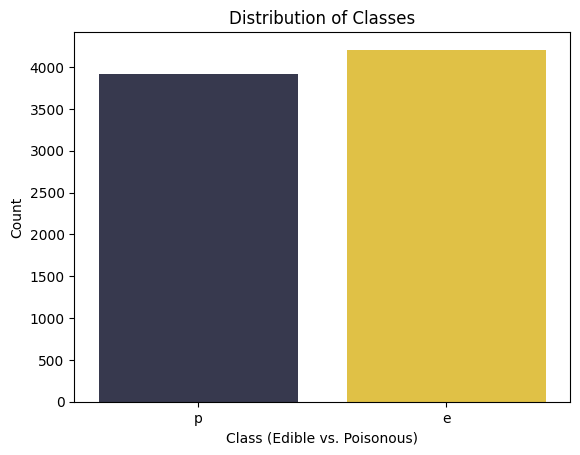

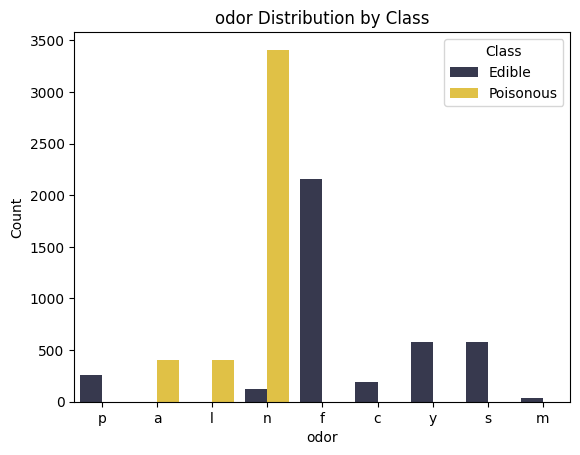

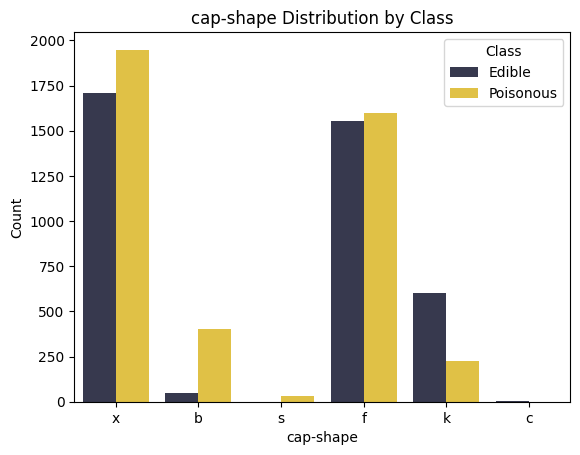

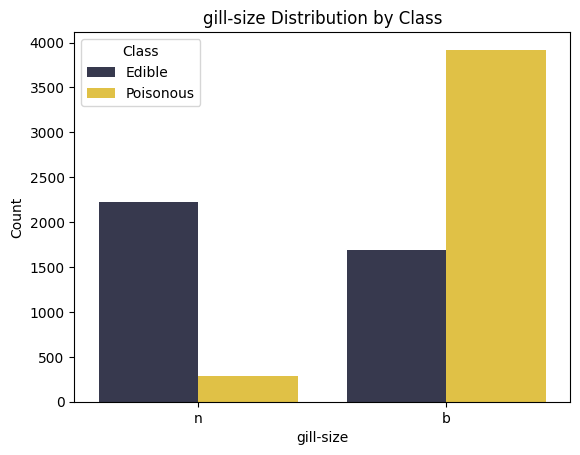

In [60]:
# Basic information about the dataset
data.info()

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Countplot for the class distribution
sns.countplot(x='class', data=data, hue='class', palette=custom_palette,
              legend=False)
plt.title('Distribution of Classes')
plt.xlabel('Class (Edible vs. Poisonous)')
plt.ylabel('Count')
plt.show()

# Explore the feature distributions
data.describe(include='all')

features_to_plot = ['odor', 'cap-shape', 'gill-size']
for feature in features_to_plot:
    sns.countplot(x=feature, data=data, hue='class', palette=custom_palette,
                  legend=False)
    plt.title(f'{feature} Distribution by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Class', labels=['Edible', 'Poisonous'])
    plt.show()


In [61]:
# Replace '?' with NaN to handle missing values
data.replace('?', np.nan, inplace=True)

# Handle missing values (Drop rows with missing values)
data.dropna(inplace=True)

# Convert categorical values to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in data.columns:
    data[column] = encoder.fit_transform(data[column])

# Verify the dataset is now numeric
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5644 entries, 0 to 8114
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     5644 non-null   int64
 1   cap-shape                 5644 non-null   int64
 2   cap-surface               5644 non-null   int64
 3   cap-color                 5644 non-null   int64
 4   bruises                   5644 non-null   int64
 5   odor                      5644 non-null   int64
 6   gill-attachment           5644 non-null   int64
 7   gill-spacing              5644 non-null   int64
 8   gill-size                 5644 non-null   int64
 9   gill-color                5644 non-null   int64
 10  stalk-shape               5644 non-null   int64
 11  stalk-root                5644 non-null   int64
 12  stalk-surface-above-ring  5644 non-null   int64
 13  stalk-surface-below-ring  5644 non-null   int64
 14  stalk-color-above-ring    5644 non-null   int

# Split and Train
Here we will split and train the data using 3 different ML models:
- Random Forest
- Naive Bayes
- Logisitic Regression

In [62]:
# Split the data into features (X) and target (y)
X = data.drop('class', axis=1)
y = data['class']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00       636

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694

Confusion Matrix for Random Forest:
[[1058    0]
 [   0  636]]
--------------------------------------------------
Training Naive Bayes...
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.99      0.81      1058
           1       0.94      0.23      0.37       636

    accuracy                           0.70      1694
   macro avg       0.81      0.61      0.59      1694
weighted avg       0.78      0.70      0.64      1694

Confusion Matrix for Naive Bayes:
[[1049    9]
 [ 491  145]]
-------------------------------------------------

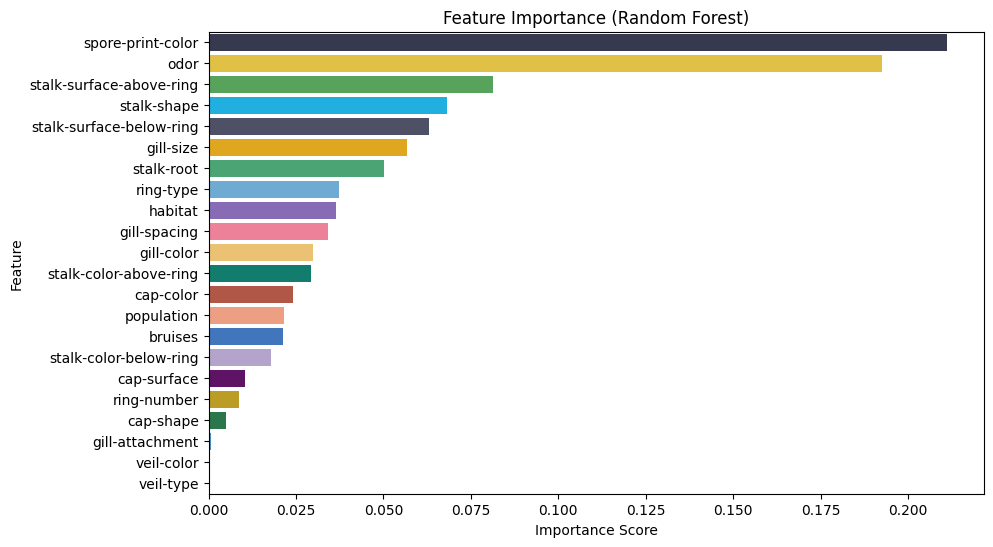

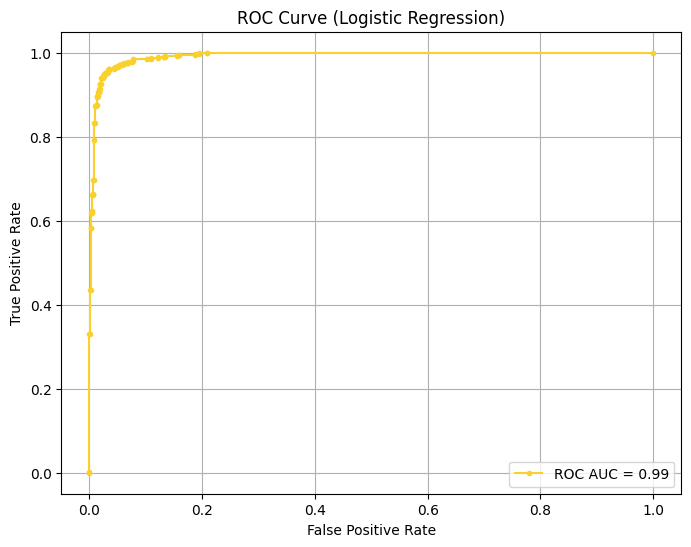

In [63]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Feature Importance for Random Forest
rf_model = models["Random Forest"]
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

custom_palette2 = ["#333652", "#FAD02C", "#4CAF50", "#00BFFF", "#4A4E69",
                   "#FFB400", "#3CB371", "#5DADE2", "#845EC2", "#FF6F91",
                   "#FFC75F", "#008F7A", "#C34A36", "#FF9671", "#2C73D2",
                   "#B39CD0", "#6A0572", "#D4AC0D", "#1E8449", "#3498DB",
                   "#E74C3C", "#F5B041"]
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances,
            hue = 'Feature', palette=custom_palette2, legend = False)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Predict probabilities for Logistic Regression
lr_model = models["Logistic Regression"]
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr,color='#FAD02C', marker='.', label=f'ROC AUC = {roc_auc:.2f}')
plt.title('ROC Curve (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Time to Visualize!
In this section, we visualized the confusion matrices for each machine learning model to understand their performance in classifying mushrooms as edible or poisonous. Additionally, we compared the models using bar plots to evaluate their accuracy, precision, recall, and F1-score, highlighting the strengths and weaknesses of each algorithm.

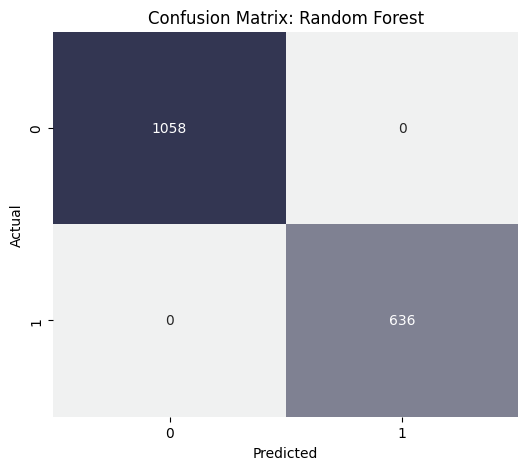

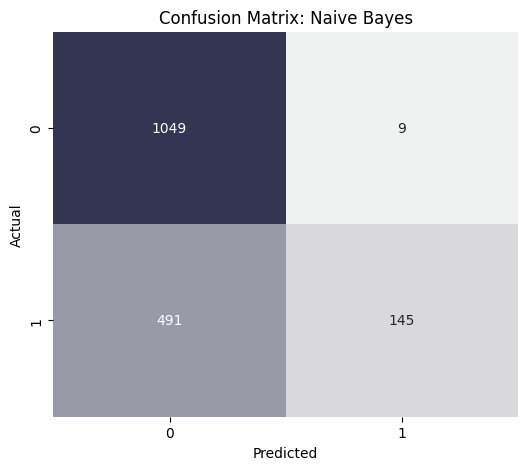

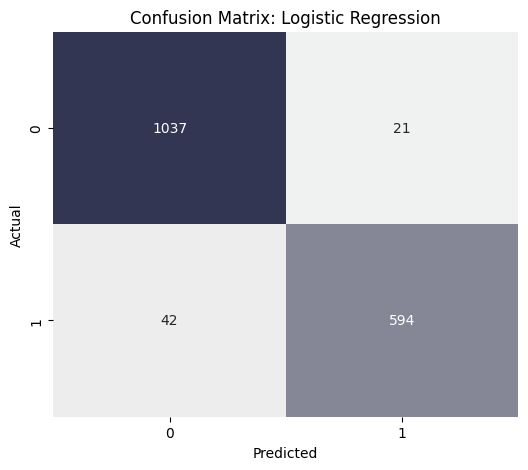

In [64]:
# plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d',
                cmap=sns.light_palette("#333652", as_cmap=True), cbar=False)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Generate and plot confusion matrices for all models
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

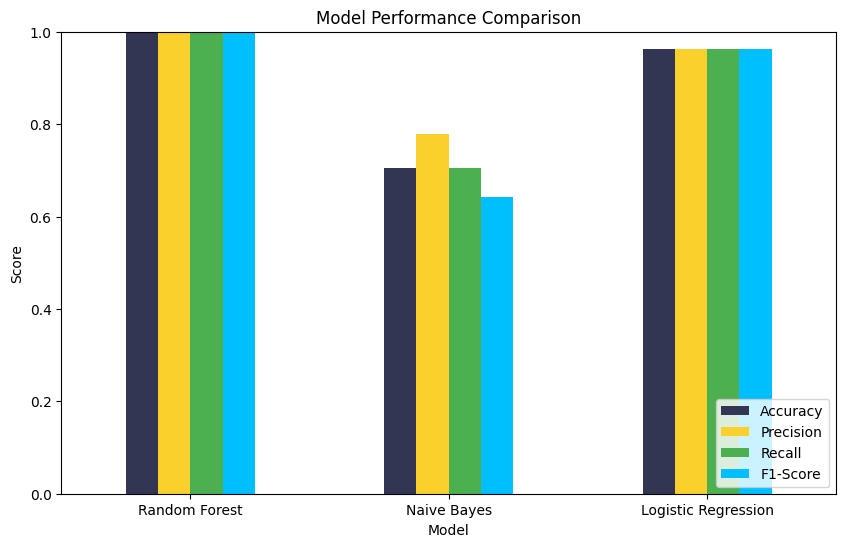

In [65]:
# Initialize a dictionary to store model metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Calculate and store metrics for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    metrics["Model"].append(name)
    metrics["Accuracy"].append(report["accuracy"])
    metrics["Precision"].append(report["weighted avg"]["precision"])
    metrics["Recall"].append(report["weighted avg"]["recall"])
    metrics["F1-Score"].append(report["weighted avg"]["f1-score"])

# Convert metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

custom_palette3 = ['#333652', '#FAD02C', '#4CAF50', '#00BFFF']
# Plot metrics
metrics_df.set_index("Model").plot(kind="bar", figsize=(10, 6),
                                   color=custom_palette3)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

# Conclusion
The Random Forest Classifier outperformed the other models with a perfect score across all evaluation metrics: accuracy, precision, recall, and F1-score, each achieving 100%. This demonstrates its exceptional ability to handle categorical data effectively and capitalize on its ensemble approach, which reduces variance and prevents overfitting. The results confirm that Random Forest is well-suited for this dataset, likely due to its capacity to manage complex interactions between features and its robustness in classification tasks. In comparison, while Logistic Regression and Naive Bayes also performed well, they did not achieve the same level of precision and recall, highlighting Random Forest's advantage in leveraging feature importance to enhance classification accuracy.